<a href="https://colab.research.google.com/github/binodshahnepal/AI-Datasets/blob/main/Kidney_Disease_Prediction_Using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kidney Disease Prediction Using Machine Learning Algorithms

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Description
* Age(numerical)
  	  	age in years
* Blood Pressure(numerical)
	       	bp in mm/Hg
*	Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
*	Albumin(nominal)
		al - (0,1,2,3,4,5)
*	Sugar(nominal)
		su - (0,1,2,3,4,5)
*	Red Blood Cells(nominal)
		rbc - (normal,abnormal)
* Pus Cell (nominal)
		pc - (normal,abnormal)
* Pus Cell clumps(nominal)
		pcc - (present,notpresent)
* Bacteria(nominal)
		ba  - (present,notpresent)
* Blood Glucose Random(numerical)
		bgr in mgs/dl
* Blood Urea(numerical)
		bu in mgs/dl
* Serum Creatinine(numerical)
		sc in mgs/dl
* Sodium(numerical)
		sod in mEq/L
* Potassium(numerical)
		pot in mEq/L
* Hemoglobin(numerical)
		hemo in gms
* Packed  Cell Volume(numerical)
* White Blood Cell Count(numerical)
		wc in cells/cumm
* Red Blood Cell Count(numerical)
		rc in millions/cmm
* Hypertension(nominal)
		htn - (yes,no)
* Diabetes Mellitus(nominal)
		dm - (yes,no)
* Coronary Artery Disease(nominal)
		cad - (yes,no)
* Appetite(nominal)
		appet - (good,poor)
* Pedal Edema(nominal)
		pe - (yes,no)
* Anemia(nominal)
		ane - (yes,no)
* Class (nominal)
		class - (ckd,notckd)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/binodshahnepal/AI-Datasets/main/kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.shape

(400, 26)

In [ ]:
df['rbc'].isnull().sum()

152

In [ ]:
df[df['rbc']==np.nan]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [ ]:
df[['rbc']].head()


,rbc
0,NaN
1,NaN
2,normal
3,normal
4,normal


In [ ]:
df.rbc.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [ ]:
df.drop(columns=['id'],inplace=True,axis=1)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.rbc.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [ ]:
df['rbc']=df['rbc'].replace('normal',0)
df['rbc']=df['rbc'].replace('abnormal',1)

In [ ]:
df['pc']=df['pc'].replace('normal',0)
df['pc']=df['pc'].replace('abnormal',1)

In [ ]:
df.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
df['pcc']=df['pcc'].replace('present',0)
df['pcc']=df['pcc'].replace('notpresent',1)

In [ ]:
df.ba.unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
df['ba']=df['ba'].replace('present',0)
df['ba']=df['ba'].replace('notpresent',1)

In [ ]:
df.htn.unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df['htn']=df['htn'].replace('yes',1)
df['htn']=df['htn'].replace('no',0)

In [ ]:
df.dm.unique()
df['dm']=df['dm'].replace('yes',1)
df['dm']=df['dm'].replace('\tyes',1)
df['dm']=df['dm'].replace('no',0)
df['dm']=df['dm'].replace('\tno',0)

In [ ]:
df.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [ ]:
df['cad']=df['cad'].replace('yes',1)
df['cad']=df['cad'].replace('no',0)
df['cad']=df['cad'].replace('\tno',0)

In [ ]:
df.appet.unique()

array(['good', 'poor', nan], dtype=object)

In [ ]:
df['appet']=df['appet'].replace('good',1)
df['appet']=df['appet'].replace('poor',0)

In [ ]:
df.pe.unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['pe']=df['pe'].replace('yes',1)
df['pe']=df['pe'].replace('no',0)

In [ ]:
df.ane.unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['ane']=df['ane'].replace('no',0)
df['ane']=df['ane'].replace('yes',1)

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df['pcv']=df['pcv'].replace('\t?',49)

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc']=df['wc'].replace('\t?','')
df['wc']=df['wc'].replace('',5000)

In [ ]:
df.rc.unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [ ]:
df['rc']=df['rc'].replace('\t?',4.9)

In [ ]:
df.dm.unique()

array([1, 0, ' yes', nan], dtype=object)

In [ ]:
df['dm']=df['dm'].replace('yes',1)

In [ ]:
df.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 49, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df['pcv']=df['pcv'].replace('\t43',43)

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 49, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', 43, '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       5000, '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc']=df['wc'].replace('\t6200',6200)
df['wc']=df['wc'].replace('\t8400',8400)

In [ ]:
df.dm.unique()

array([1, 0, ' yes', nan], dtype=object)

In [ ]:
df['dm']=df['dm'].replace(' yes',1)

In [ ]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
for col in df.columns:
  if '\t?' in df[col]:
    df[col]=df[col].replace('\t?','')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
from sklearn.impute import SimpleImputer
# Apply SimpleImputer to the remaining columns
columns=df.drop(columns=['classification'])
imputer = SimpleImputer(strategy='median')
dfUpdated = pd.DataFrame(imputer.fit_transform(columns), columns=columns.columns)
df=pd.concat([dfUpdated,df.classification],axis=1)


In [ ]:
dfUpdated.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,ckd


In [ ]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
df['classification']=df['classification'].replace('ckd',1)
df['classification']=df['classification'].replace('notckd',0)
df['classification']=df['classification'].replace('ckd\t',1)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

### Finding out the outlier

In [ ]:
for col in df.columns:
  print(col,"\n-----------------------------------------------\n",df[col].unique())

age 
-----------------------------------------------
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]
bp 
-----------------------------------------------
 [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]
sg 
-----------------------------------------------
 [1.02  1.01  1.005 1.015 1.025]
al 
-----------------------------------------------
 [1. 4. 2. 3. 0. 5.]
su 
-----------------------------------------------
 [0. 3. 4. 1. 2. 5.]
rbc 
-----------------------------------------------
 [0. 1.]
pc 
-----------------------------------------------
 [0. 1.]
pcc 
-----------------------------------------------
 [1. 0.]
ba 
-----------------------------------------------
 [1. 0.]
bgr 
-----------------------------------------------
 

In [ ]:
columnsThatMayContainOutliers=df[['age','bgr','bu','sc','sod','hemo','pcv','wc','rc']]

In [ ]:
columnsThatMayContainOutliers.head()

,age,bgr,bu,sc,sod,hemo,pcv,wc,rc
0,48.0,121.0,36.0,1.2,138.0,15.4,44.0,7800.0,5.2
1,7.0,121.0,18.0,0.8,138.0,11.3,38.0,6000.0,4.8
2,62.0,423.0,53.0,1.8,138.0,9.6,31.0,7500.0,4.8
3,48.0,117.0,56.0,3.8,111.0,11.2,32.0,6700.0,3.9
4,51.0,106.0,26.0,1.4,138.0,11.6,35.0,7300.0,4.6


In [ ]:
for col in columnsThatMayContainOutliers:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upperBound=q3+1.5*iqr
  lowerBound=q1-1.5*iqr
  outliers=df[(df[col]>upperBound)|(df[col]<lowerBound)]
  print(f"Number of outliers in : {col} : {len(outliers)}")

Number of outliers in : age : 10
Number of outliers in : bgr : 53
Number of outliers in : bu : 41
Number of outliers in : sc : 53
Number of outliers in : sod : 18
Number of outliers in : hemo : 2
Number of outliers in : pcv : 6
Number of outliers in : wc : 17
Number of outliers in : rc : 75


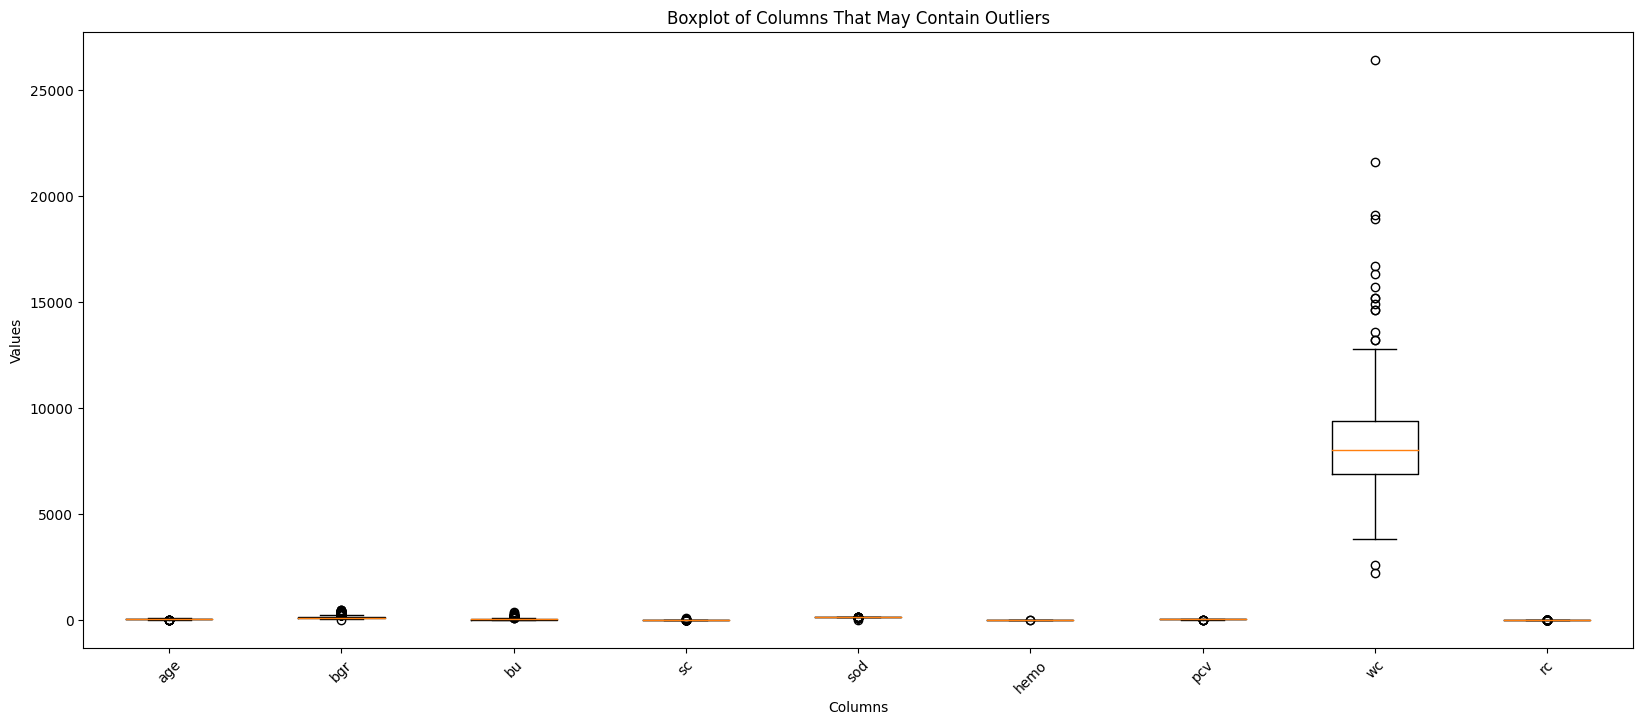

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.boxplot([df[col].dropna() for col in columnsThatMayContainOutliers.columns])
plt.xticks(range(1, len(columnsThatMayContainOutliers.columns) + 1), columnsThatMayContainOutliers.columns, rotation=45)
plt.title("Boxplot of Columns That May Contain Outliers")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [ ]:
import plotly.express as px
# Melt the DataFrame for Plotly Express
df_melted = df.melt(value_vars=columnsThatMayContainOutliers, var_name='Columns', value_name='Values')

# Create box plot using Plotly Express
fig = px.box(df_melted, x='Columns', y='Values', title="Boxplot of Columns That May Contain Outliers")

# Show plot
fig.show()

In [ ]:
df.bu.max()-df.bu.min()


389.5

In [ ]:
df.wc.max()-df.wc.min()

24200.0

### Exploratory Data Ananlysis

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='age')
fig.show()


In [ ]:
fig = px.scatter(df, x='age', y='bgr')
fig.show()

In [ ]:
import plotly.figure_factory as ff
import numpy as np
plt.figure(figsize=(35,12))
correlation_matrix = df.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis'
)
fig.show()
plt.show()


<Figure size 3500x1200 with 0 Axes>

In [ ]:
fig = px.pie(df, names='htn')
fig.show()


In [ ]:
fig = px.strip(df, x='htn', y='age', orientation='v', stripmode='overlay')
fig.show()


In [ ]:
fig = px.bar(df, x='htn', y='age', color='htn')
fig.show()


In [ ]:
fig = px.density_heatmap(df, x='age', y='bgr')
fig.show()


In [ ]:
fig = px.scatter_3d(df, x='age', y='bgr', z='bu', color='htn')
fig.show()


In [ ]:
fig = px.histogram(df, x='age', facet_col='htn')
fig.show()


In [ ]:
fig = px.sunburst(df, path=['htn', 'dm', 'cad'], values='age')
fig.show()


In [ ]:
fig = px.scatter(df, x='age', y='bgr', size='bu', color='htn', hover_name='age', size_max=60)
fig.show()


In [ ]:
fig = px.scatter(df, x='age', y='bgr', size='bu', color='htn', hover_name='age', size_max=60)
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x,y=(df.drop(columns='classification'),df['classification'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
x.shape

(400, 24)

In [ ]:
y.shape

(400,)

Model: Logistic Regression
Accuracy: 0.97
Recall: 0.98
F1 Score: 0.97
Precision: 0.97
------------------------------


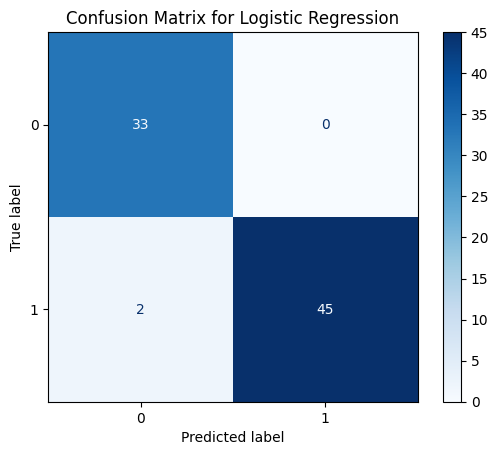

Model: Ridge Classifier
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


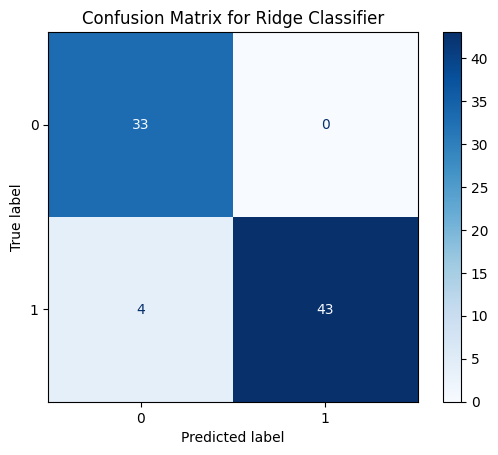

Model: SGD Classifier
Accuracy: 0.99
Recall: 0.98
F1 Score: 0.99
Precision: 0.99
------------------------------


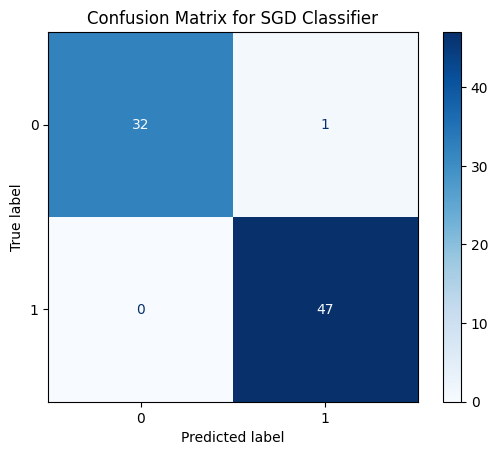

Model: Perceptron
Accuracy: 0.99
Recall: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


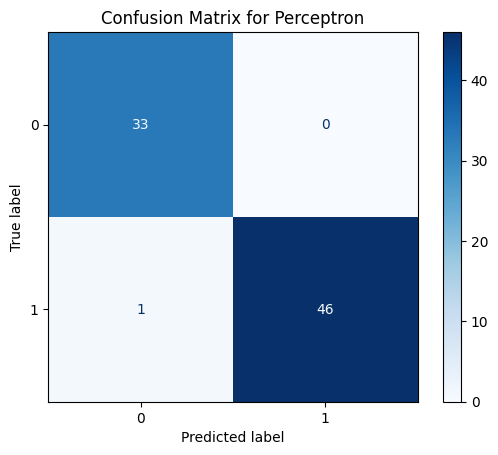

Model: Linear Discriminant Analysis
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


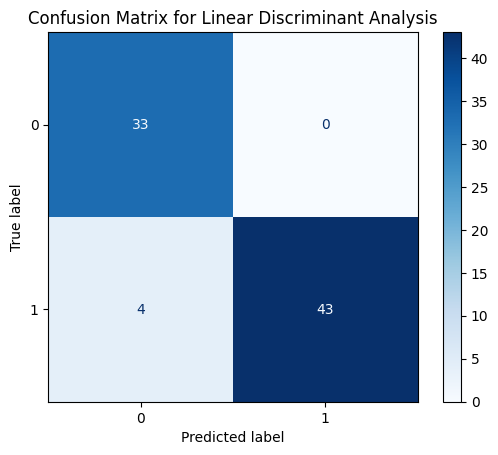

Model: k-NN
Accuracy: 0.93
Recall: 0.94
F1 Score: 0.92
Precision: 0.92
------------------------------


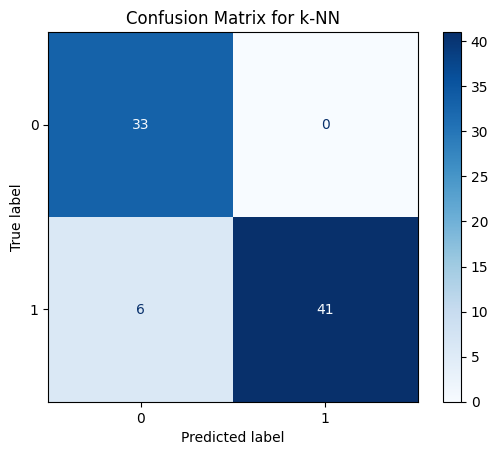

Model: Nearest Centroid
Accuracy: 0.88
Recall: 0.89
F1 Score: 0.87
Precision: 0.88
------------------------------


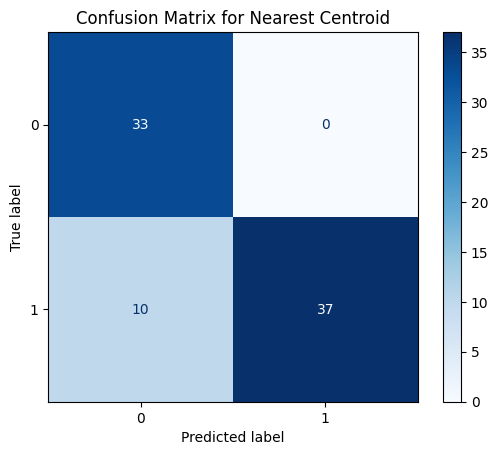

Model: SVM
Accuracy: 0.97
Recall: 0.98
F1 Score: 0.97
Precision: 0.97
------------------------------


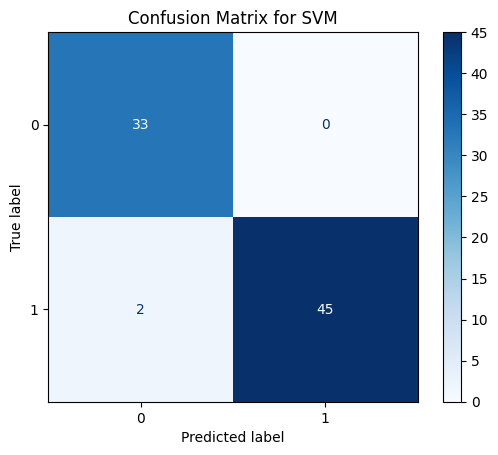

Model: Decision Tree
Accuracy: 0.99
Recall: 0.98
F1 Score: 0.99
Precision: 0.99
------------------------------


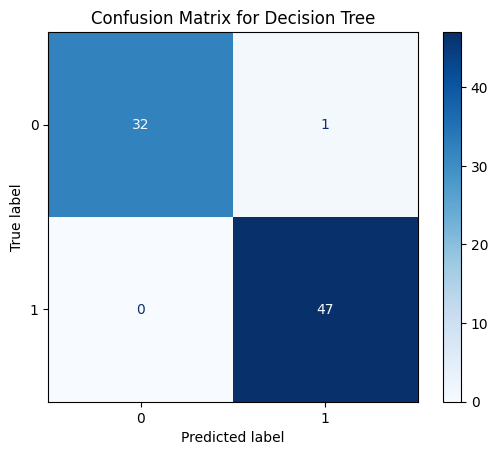

Model: Random Forest
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Precision: 1.00
------------------------------


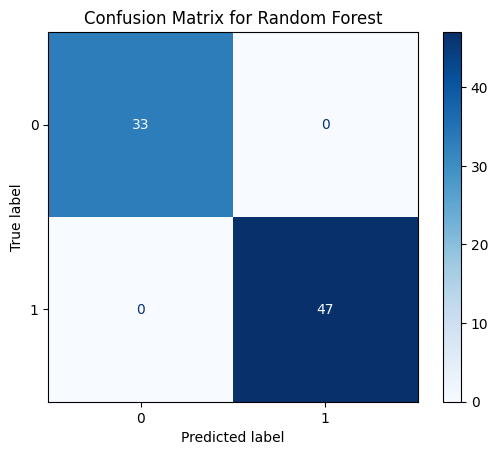

Model: Gradient Boosting
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Precision: 1.00
------------------------------


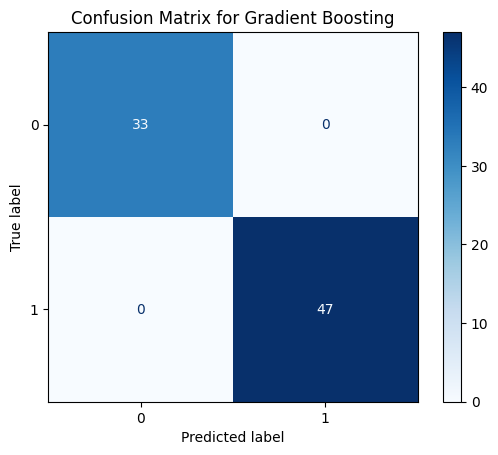

Model: AdaBoost
Accuracy: 0.99
Recall: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


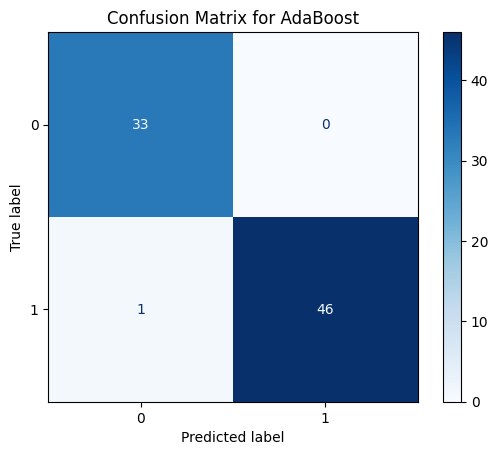

Model: XGBoost
Accuracy: 0.99
Recall: 0.98
F1 Score: 0.99
Precision: 0.99
------------------------------


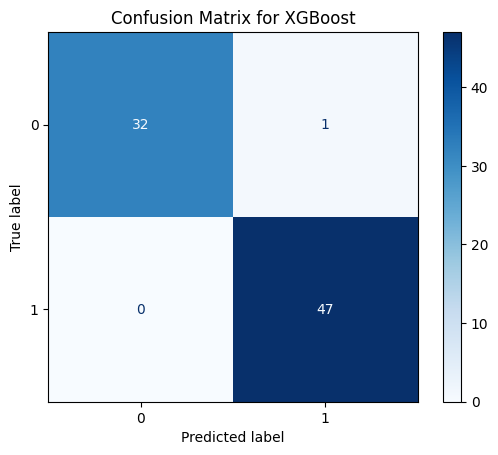

Model: Gaussian Naive Bayes
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


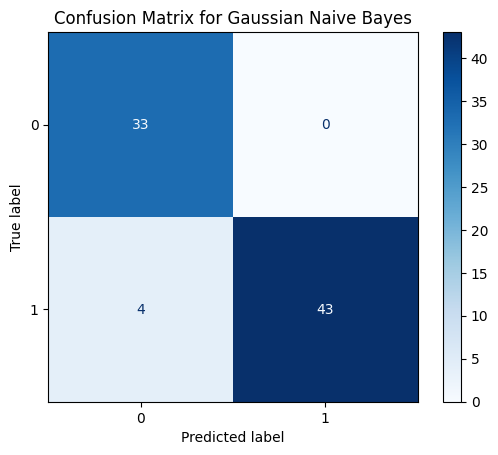

Model: Bernoulli Naive Bayes
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


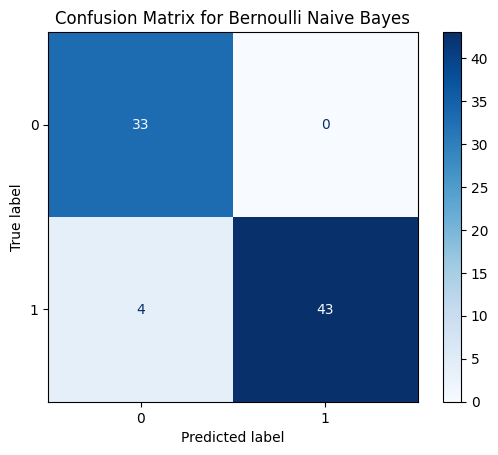

Model: Extra Trees
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Precision: 1.00
------------------------------


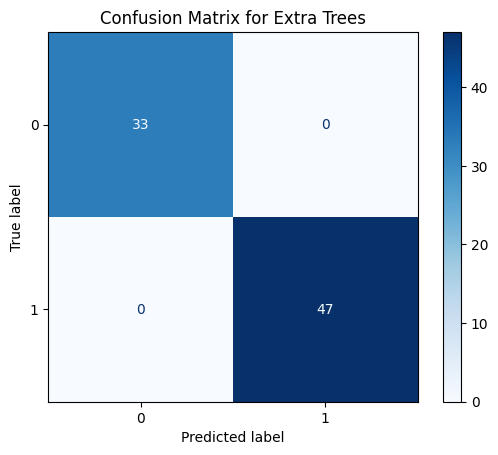

Model: MLP
Accuracy: 0.99
Recall: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


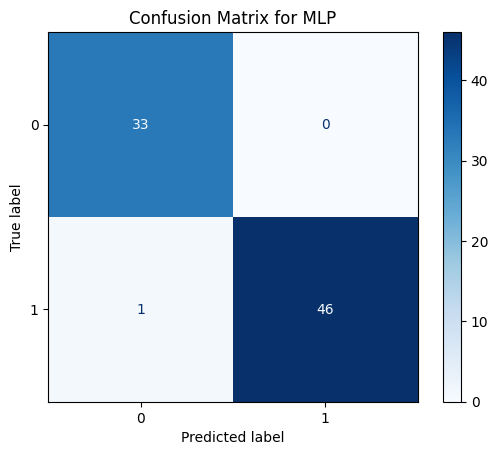

Model: Bagging
Accuracy: 0.99
Recall: 0.98
F1 Score: 0.99
Precision: 0.99
------------------------------


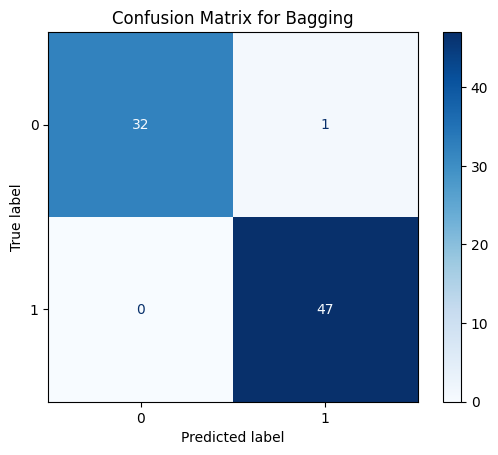

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide



Model: Label Propagation
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


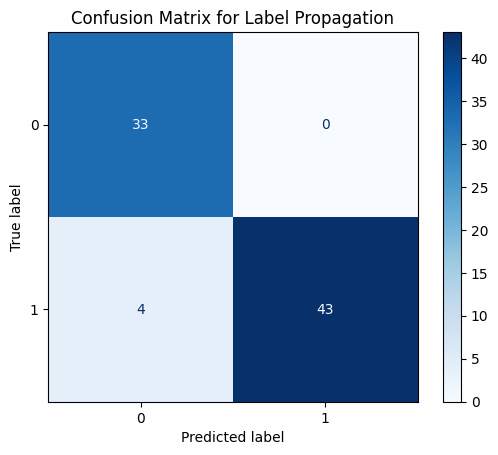

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide



Model: Label Spreading
Accuracy: 0.95
Recall: 0.96
F1 Score: 0.95
Precision: 0.95
------------------------------


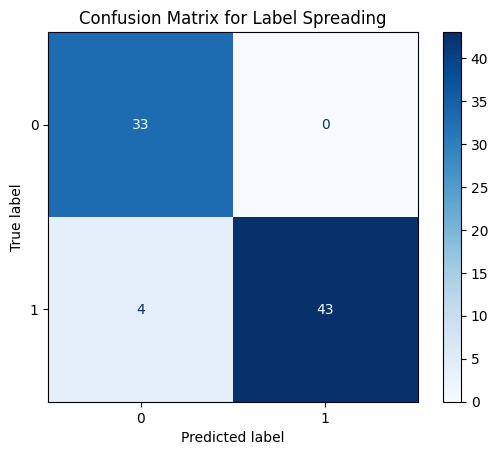

Model: Stacking Classifier
Accuracy: 0.99
Recall: 0.98
F1 Score: 0.99
Precision: 0.99
------------------------------


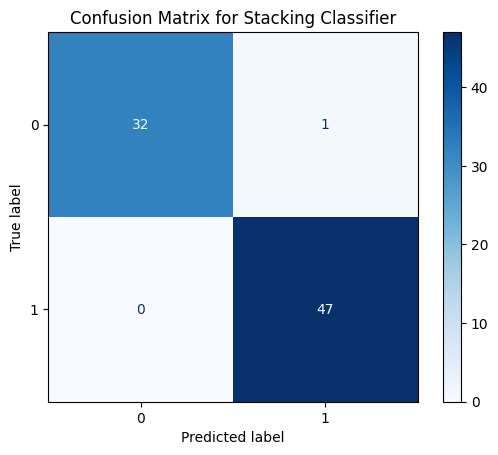

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Importing all classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

# Assuming df is your custom dataframe
# Replace this with the actual loading of your dataset
# df = pd.read_csv('your_dataset.csv')
# For the purpose of this example, let's create a dummy dataframe
df = pd.DataFrame({
    'feature1': np.random.rand(150),
    'feature2': np.random.rand(150),
    'feature3': np.random.rand(150),
    'feature4': np.random.rand(150),
    'target': np.random.randint(0, 3, 150)
})


# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=500)),
    ('Ridge Classifier', RidgeClassifier()),
    ('SGD Classifier', SGDClassifier()),
    ('Perceptron', Perceptron()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('k-NN', KNeighborsClassifier()),
    ('Nearest Centroid', NearestCentroid()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss')),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('MLP', MLPClassifier(max_iter=500)),
    ('Bagging', BaggingClassifier()),
    ('Label Propagation', LabelPropagation()),
    ('Label Spreading', LabelSpreading())
]

# Stacking Classifier (example configuration)
estimators = [
    ('lr', LogisticRegression(max_iter=500)),
    ('dt', DecisionTreeClassifier())
]
models.append(('Stacking Classifier', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=500))))

# Function to evaluate and print metrics for each model
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 30)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# Evaluating each model
for name, model in models:
    evaluate_model(name, model)

